<a href="https://colab.research.google.com/github/belogurow/BMSTU_IU9/blob/master/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


TensorFlow 2.x selected.


# Загрузка датасета одежды

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
print(train_images.shape)
print(train_labels)

(60000, 28, 28)
[9 0 0 ... 3 0 5]


Так как каждый пиксель представляет собой значение в диапозоне $[0, 255]$, то изменим это значение для соответствия диапозону $[0, 1]$

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Пример обучающей выборки

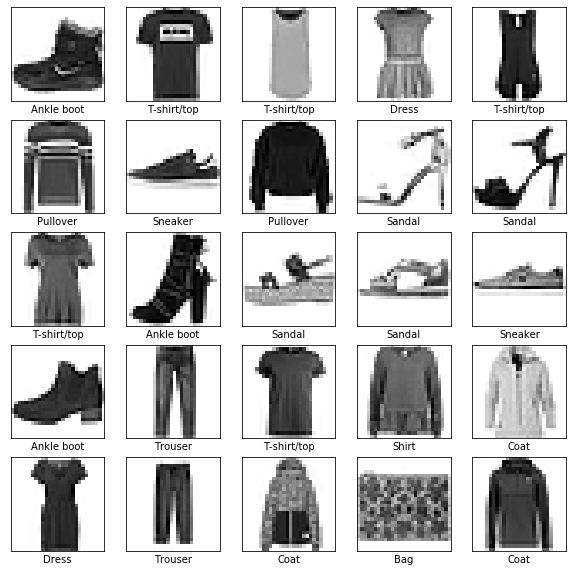

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Настройка модели

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение

In [7]:
epochs_num = 50
model.fit(train_images, train_labels, epochs=epochs_num)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 154us/sample - loss: 0.4636 - accuracy: 0.8342
Epoch 2/50
60000/60000 [==============================] - 9s 142us/sample - loss: 0.3548 - accuracy: 0.8701
Epoch 3/50
60000/60000 [==============================] - 9s 146us/sample - loss: 0.3186 - accuracy: 0.8816
Epoch 4/50
60000/60000 [==============================] - 8s 138us/sample - loss: 0.2984 - accuracy: 0.8905
Epoch 5/50
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2787 - accuracy: 0.8960
Epoch 6/50
60000/60000 [==============================] - 8s 132us/sample - loss: 0.2606 - accuracy: 0.9034
Epoch 7/50
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2508 - accuracy: 0.9076
Epoch 8/50
60000/60000 [==============================] - 7s 124us/sample - loss: 0.2394 - accuracy: 0.9102
Epoch 9/50
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2268 - accuracy: 0.9154
Epoch

# Проверка на тестовой выборке

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/1 - 1s - loss: 0.4170 - accuracy: 0.8822


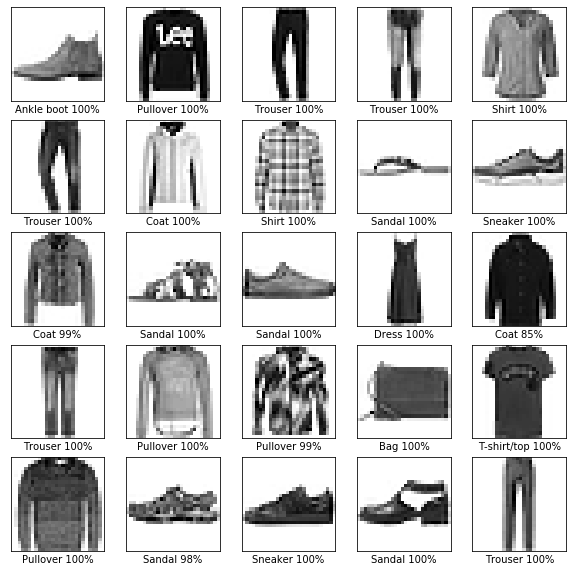

In [9]:
predictions = model.predict(test_images)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'{class_names[np.argmax(predictions[i])]} {100*np.max(predictions[i]):2.0f}%')
plt.show()
